In [112]:
import pandas as pd

In [113]:
X_train, y_train, X_test, y_test = pd.read_pickle('data/cancer.pkl')

In [114]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(489, 9) (489,) (210, 9) (210,)


In [115]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [116]:
print(X.shape, y.shape)

(699, 9) (699,)


In [117]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [118]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

In [119]:
def svm_linear(X, y):
    svm_linear =svm.SVC(kernel = 'linear')
    result = pd.DataFrame(cross_validate(svm_linear, X, y, cv = 5))
    print(result, '\n')
    print('평균: ', result.test_score.mean(), '\n')

In [120]:
def svm_rbf(X, y):
#   svm_rbf =svm.SVC(kernel = 'rbf', gamma='auto')
    svm_rbf =svm.SVC(kernel = 'rbf', C=50, gamma=10)
    result = pd.DataFrame(cross_validate(svm_rbf, X, y, cv = 5))
    print(result, '\n')
    print('평균: ', result.test_score.mean(), '\n')

In [121]:
svm_linear(X, y)

   fit_time  score_time  test_score
0  0.002002    0.001009    0.971631
1  0.002995    0.000000    0.978571
2  0.002011    0.000989    0.964286
3  0.003008    0.000000    0.956835
4  0.002989    0.001011    0.956835 

평균:  0.9656314826558207 



In [122]:
svm_rbf(X, y)

   fit_time  score_time  test_score
0  0.010996    0.002016    0.907801
1  0.010995    0.002990    0.900000
2  0.010015    0.000982    0.850000
3  0.009994    0.002002    0.856115
4  0.009999    0.002001    0.856115 

평균:  0.8740063268534108 



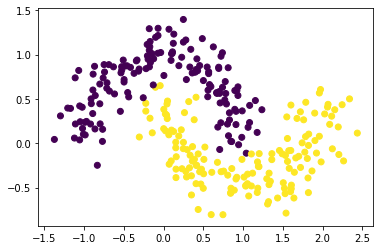

In [123]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X2, y2 = make_moons(n_samples = 300, noise = 0.16, random_state = 42)

plt.scatter(X2[:,0],X2[:,1],c=y)
plt.show()

In [124]:
svm_linear(X, y)
svm_rbf(X, y)

   fit_time  score_time  test_score
0  0.001001    0.000997    0.866667
1  0.000999    0.000000    0.883333
2  0.001000    0.000000    0.883333
3  0.001001    0.001002    0.833333
4  0.000000    0.001003    0.833333 

평균:  0.86 

   fit_time  score_time  test_score
0  0.001998    0.000000    0.983333
1  0.001002    0.000000    1.000000
2  0.000999    0.000000    0.983333
3  0.001001    0.000999    0.983333
4  0.001001    0.000000    0.983333 

평균:  0.9866666666666667 



In [125]:
from sklearn.model_selection import GridSearchCV

svm_rbf = svm.SVC(kernel = 'rbf',random_state=100)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_rbf, param_grid = params, cv = 5)
grid_svm.fit(X, y)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

,C,gamma,mean_test_score
52,50.000,10.000,0.986667
53,50.000,25.000,0.986667
45,25.000,25.000,0.986667
60,100.000,10.000,0.986667
61,100.000,25.000,0.986667
44,25.000,10.000,0.983333
35,10.000,1.000,0.983333
37,10.000,25.000,0.983333
4,0.001,10.000,0.980000
20,0.100,10.000,0.980000
